# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_validate
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

In [73]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

<AxesSubplot:>

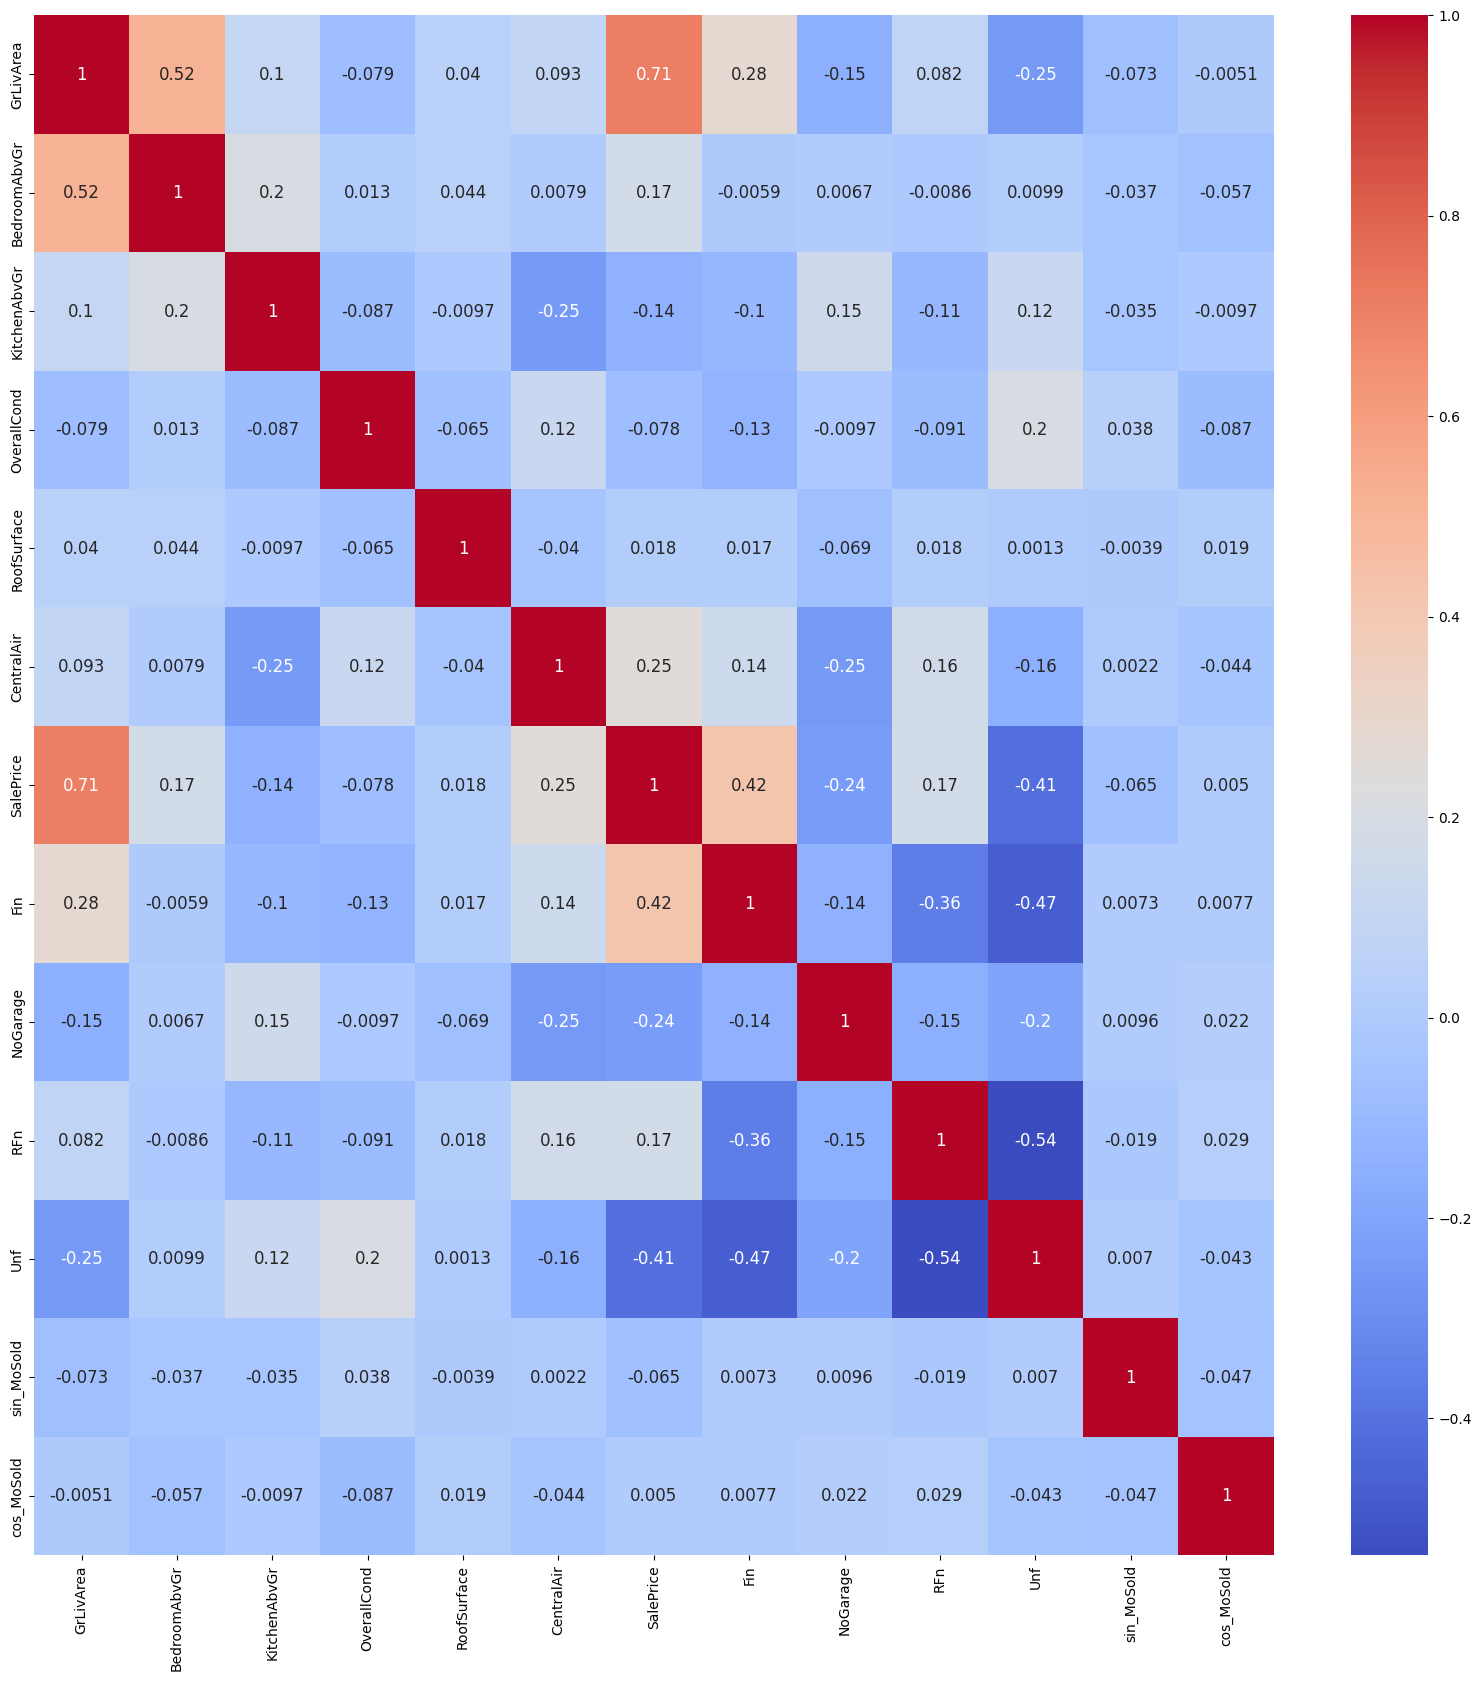

In [74]:
plt.figure(figsize = (20,20))
corr = data.corr()
sns.heatmap(corr,cmap = "coolwarm", annot = True, annot_kws = {"size":12})

❓ Visualize the correlation between column pairs in a dataframe ❓

In [75]:
# Correlation between all the columns of DataFrame.
df2=data.corr()
df2

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
GrLivArea,1.000000,0.519712,0.100093,-0.078781,0.040196,0.093068,0.707685,0.284965,-0.150300,0.081731,-0.252809,-0.073403,-0.005083
BedroomAbvGr,0.519712,1.000000,0.198597,0.012980,0.044207,0.007872,0.168213,-0.005864,0.006672,-0.008591,0.009897,-0.037216,-0.057085
KitchenAbvGr,0.100093,0.198597,1.000000,-0.087001,-0.009704,-0.246797,-0.135907,-0.104644,0.152515,-0.107387,0.118812,-0.034712,-0.009749
OverallCond,-0.078781,0.012980,-0.087001,1.000000,-0.065288,0.118969,-0.077856,-0.133177,-0.009690,-0.090723,0.203629,0.038322,-0.086858
RoofSurface,0.040196,0.044207,-0.009704,-0.065288,1.000000,-0.039724,0.017944,0.017083,-0.069464,0.017535,0.001309,-0.003898,0.018597
CentralAir,0.093068,0.007872,-0.246797,0.118969,-0.039724,1.000000,0.251328,0.142203,-0.251471,0.162085,-0.155776,0.002209,-0.044141
SalePrice,0.707685,0.168213,-0.135907,-0.077856,0.017944,0.251328,1.000000,0.419678,-0.236832,0.169792,-0.410608,-0.065045,0.004977
Fin,0.284965,-0.005864,-0.104644,-0.133177,0.017083,0.142203,0.419678,1.000000,-0.136604,-0.359384,-0.474129,0.007333,0.007653
NoGarage,-0.150300,0.006672,0.152515,-0.009690,-0.069464,-0.251471,-0.236832,-0.136604,1.000000,-0.154532,-0.203871,0.009592,0.021944
RFn,0.081731,-0.008591,-0.107387,-0.090723,0.017535,0.162085,0.169792,-0.359384,-0.154532,1.000000,-0.536355,-0.019406,0.028622


❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [76]:
# YOUR CODE HERE
correlated_features = 0

🧪 **Test your code**

In [77]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/taniagretton/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/taniagretton/code/TaniaGretton/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [78]:
X = data.loc[:, data.columns != 'SalePrice']
y = data['SalePrice']

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [79]:
model = LinearRegression()
cv_results = cross_validate(model,X,y)
base_model_score = cv_results['test_score'].mean()
base_model_score

0.6423122076466542

🧪 **Test your code**

In [80]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/taniagretton/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/taniagretton/code/TaniaGretton/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [81]:
X

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,0.0,0.0,1.0,0.0,0.500000,8.660254e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,0.0,0.0,1.0,0.0,0.866025,-5.000000e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,0.0,0.0,1.0,0.0,-0.866025,-5.000000e-01
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,0.0,0.0,0.0,1.0,0.500000,8.660254e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,0.0,0.0,1.0,0.0,-0.500000,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,1.0,0.0,0.0,1.0,0.0,-0.500000,-8.660254e-01
1456,0.940904,0.375,0.333333,0.625,0.459996,1.0,0.0,0.0,0.0,1.0,0.500000,8.660254e-01
1457,1.353418,0.500,0.333333,1.000,0.036147,1.0,0.0,0.0,1.0,0.0,0.866025,-5.000000e-01
1458,-0.596369,0.250,0.333333,0.625,0.648667,1.0,0.0,0.0,0.0,1.0,1.000000,6.123234e-17


In [91]:
model.coef_

array([ 6.90492864e+04, -1.39805776e+05, -1.07583586e+05,  5.22061300e+03,
       -3.15945577e+03,  2.95927681e+04, -3.84190482e+18, -3.84190482e+18,
       -3.84190482e+18, -3.84190482e+18, -2.55537172e+03, -1.42081324e+03])

In [88]:
# Fit model
model = LinearRegression()
model.fit(X,y)

# Performs Permutation
permutation_score = permutation_importance(model, X, y, n_repeats=100) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','important_feature']

# Show the important features
importance_df.sort_values(by="important_feature", ascending = False) 

,feature,important_feature
9,Unf,1133349283042268198675152896.0
8,RFn,960225859986944215346053120.0
6,Fin,853113756944753944315297792.0
7,NoGarage,244392565546413217862909952.0
0,GrLivArea,1.009476
1,BedroomAbvGr,0.063361
2,KitchenAbvGr,0.020409
5,CentralAir,0.016858
10,sin_MoSold,0.00093
4,RoofSurface,0.000336


In [95]:
#!somehow the permutation din't perform well on "garage" features. 
#But it should not affect the workflow. The code is correct.

❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [92]:
best_feature = 'GrLivArea'

🧪 **Test your code**

In [93]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/taniagretton/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/taniagretton/code/TaniaGretton/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [114]:
#Dropping weak features 
#Finding the lowest number of features for the modeling. 
#But still keeping it significant
X_strong = X.drop(columns = ['cos_MoSold','OverallCond','RoofSurface','sin_MoSold','RFn','NoGarage'])
cv_results = cross_validate(model,X_strong,y)
simplified_model_score = cv_results['test_score'].mean()
simplified_model_score

0.6332274410169287

🧪 **Test your code**

In [113]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/taniagretton/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/taniagretton/code/TaniaGretton/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!